## Math 157 Final Project Winter 2020

# Logistic Regression:

### By Boris Rubel 



#### Sources:
- https://www.economist.com/leaders/2017/05/06/the-worlds-most-valuable-resource-is-no-longer-oil-but-data
- https://www.youtube.com/watch?v=vN5cNN2-HWE
- https://www.kaggle.com/taranmarley/perth-temperatures-and-rainfall
- https://www.youtube.com/watch?v=BfKanl1aSG0
- Pictures 1,2,3 were found on google images. The remaining pictures are credited to Josh Starmer from Youtube

#### What is regression?
Regression in general is a statistical tool used to identify and model relationships between variables found in numerous types of data. With the growing rate data science, it is becoming increasingly important to find trends in the real world and then act accordingly. This even goes to the extent of the Economist stating that "The world’s most valuable resource is no longer oil, but data!". It is more clear than ever that utilizing a tool like regression to model trends in the real world will continue to benefit society. 

Lets explore further!

#### Different Types of Regression and Terminology:
As we know, data can take on many forms, so we can utilize different types of regression to properly draw conclusions. The variables found in data include **independent( variables on the x-axis)** and **dependent(variables on the y-axis)**
where the dependent variables are directly affected by the independent variables. 

#### Linear Regression
<img src="Linear.jpg" width="35%">

This type of regression we saw in class, and it is clear that the data exhibits a linear relationship between variables, be it time passed and property value or height in our earlier years.

What happens if the data is non-linear?

#### Linear Interpolation
<img src="interp.jpg" width="35%">

From a glance, you can tell that the red data points in the graph above do not have a linear relationship. To model this data, in short, we can calculate a **different** linear relationship between each set of two points and thus fit the data more tightly than a simple linear regression.

Now lets take it a step further. What if we do not want a linear function between any two points, but rather an even closer representation of the data?

#### Splines
<img src="splines.jpg" width="35%">

We can again see that our data does not have a linear relationship. So in order to incorporate an even better fit, we utilize splines as a **nonlinear** form of regression.

So what is the key take away from this? Different types of data can be modelled with different types of regression.

These concepts allow us to segway into now exploring our main topic, **logistic regression**.

## Logistic Regression

- Logistic regression utilizes classfying variables into the categories of TRUE or FALSE, rather than predict something continious, say the height of a person at the age of 17. This essentially implies that our y-axis variable(dependent variable) will follow a bernouli distribtion as there are two possible outcomes. 
- A characteristic of a logistic regression model is that the y axis goes from 0 to 1, with an "S" shaped curve fitting the data, as compared to the rather different shapes of the fitted lines in our examples above. Note that that the nature of the y-axis highlights the **probability** of the dependent variables following our stated hypothesis.

<img src="Sgraph.jpg" width="35%">

- This can be attributed to the function $$ y(t)=\frac{e^t}{e^t +1}$$ where t is given by the same linear function as we saw in our original linear regression with multiple variables: $$ t= intercept + \sum_{i=1}^{n}{coefficient_{i}}*x_{i} $$.
- These relations attribute to the unique shape of the line in the graph above. As linear regression uses least squares to fit the line, logistic regression will utilize **maximum likelihood** instead


### Lets Dive Into Some Applications!

Lets begin by applying our familiar method of linear regression to some data on graduate school admissions.

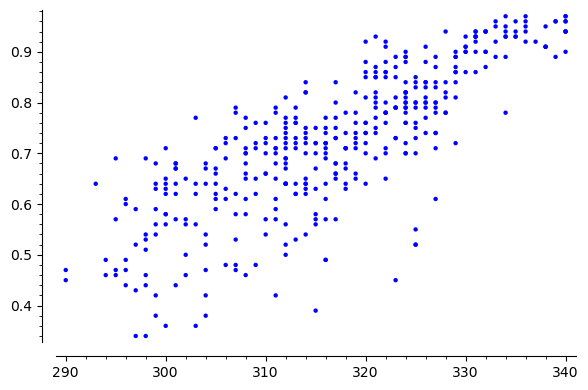

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
college=pd.read_csv('Admission_Predict.csv')

gre=list(college["GRE Score"])
pro=list(college["Chance of Admit "])
p=list_plot(list(zip(gre,pro)))
show(p)
college.head()

Lets examine an applicant's chances of getting into college given their GRE Scores and see if we can determine a relationship.

0.009975882025681383
-2.4360842448510542


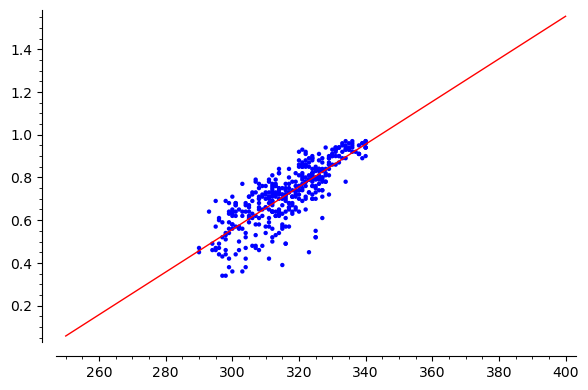

In [2]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

gre = np.array(college["GRE Score"])
pro = np.array(college["Chance of Admit "])

ols.fit(gre[:, np.newaxis], pro[:, np.newaxis])
a = ols.coef_[0][0]
b = ols.intercept_[0]
print(a)
print(b)
list_plot([(gre[i],pro[i]) for i in range(len(gre))]) +plot(a*x + b, (250,400), color = 'red')


Now in order to properly analyze logistic regression, we will round the probabilities of getting into graduate school to 0 if it less then or equal to  .5 and to 1 if it is greater than .5. This is becuase as saw before, the outputs for logistic regression are classified into either TRUE or FALSE, or two binary outcomes. 

## ************************** Participation Check 1 **************************

Now in order to properly implement logistic regression, the outputs must be classified into either TRUE or FALSE, or two outcomes in order to follow a bernouli distribution. Modify an applicant's chance of admission or  "Chance of Admit" to be used for a logistic regression analysis. In other words, if an applicant's chances of getting in is $p<=.5$ set $p=0$ and if $p>.5$ set $p=1$. 

In [3]:
newp=[]
for p in pro:
    if p>.5:
        p=1
        newp.append(p)
    else:
        p=0
        newp.append(p)
#print(newp)

## ************************** ********************* **************************

0.16901996219298931
-49.936014466166284


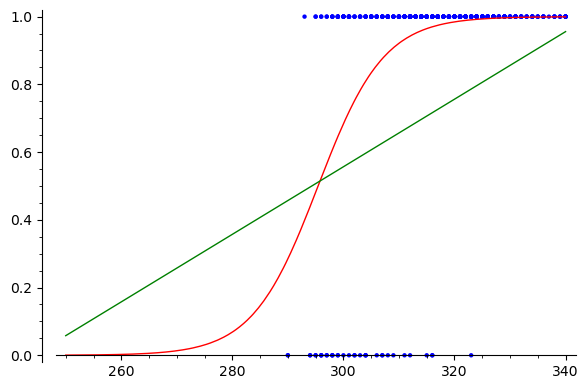

In [5]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

gre = np.array(college["GRE Score"])
newPro = newp

lg.fit(gre[:, np.newaxis], newPro)
c = lg.coef_[0][0]
d = lg.intercept_[0]
#print(c)
#print(d)
list_plot([(gre[i],newPro[i]) for i in range(len(gre))]) + plot(e^(c*x + d)/(e^(c*x + d)+1), (250,340), color = 'red')+plot(a*x + b, (250,340), color = 'green')



The red line is representative of logistic regression, whereas the green line is the more familiar linear regression we are more familiar with. Its clear in this side by side comparison that using logistic regression gives a much more suitable fir to our data. Now lets add in some more factors that may contribute to an applicants admission status, say CGPA or Cumilative Grade Point Average.

In [6]:
cgpa = list(np.array(college["CGPA"]))
lg.fit(college[["GRE Score","CGPA"]],newPro)

LogisticRegression()

In [7]:
c = lg.coef_[0][0]
c1=lg.coef_[0][1]
d = lg.intercept_[0]
print(c)
print(c1)
print(d)

0.08466101052366208
2.595230434383776
-45.04764817299762


Now plotting our acquirred function in two variables in order to show a direct relationship will be quite messy as it requires a 3d plot. Instead we will fix someones cumilitive GPA and notice how heavily it affects our applicants chances of admission.

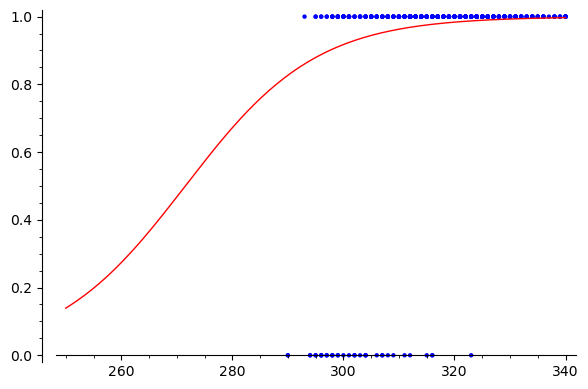

In [15]:
var('x','z')
z=8.5
f(x)=e^(c*x + c1*z + d)/(e^(c*x + c1*z + d)+1)

list_plot([(gre[i],newPro[i]) for i in range(len(gre))]) + plot(f, (250,340), color = 'red')


## ************************** Participation Check 2 **************************

What can you say about the applicant's chances when you compare the highest gpa with lowest gpa out of the 400 applicants? Compare the two by plotting them on the same graph in order to compare the resulting logistic regression fits. 

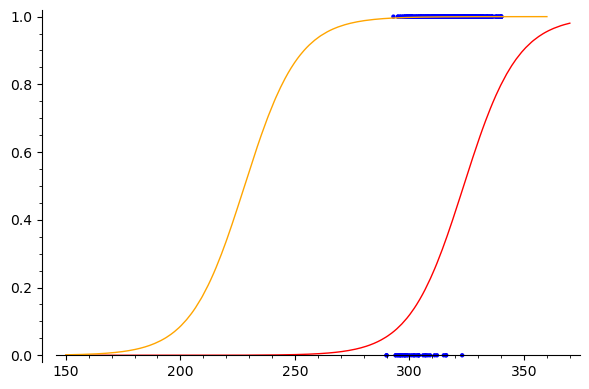

In [20]:
z1=min(cgpa)
z2=max(cgpa)
f1(x)=e^(c*x + c1*z1 + d)/(e^(c*x + c1*z1 + d)+1)
f2(x)=e^(c*x + c1*z2 + d)/(e^(c*x + c1*z2 + d)+1)
list_plot([(gre[i],newPro[i]) for i in range(len(gre))]) + plot(f1, (150,370), color = 'red')+ plot(f2, (150,360), color = 'orange')


## ************************** ******************* **************************

We can clearly see the effects of how much pull having a higher CGPA will have on your college admissions status. However what if we wanted to test the significance of a variable in contributing to classifying our y variables? For example does TOEFL Score really impact ones acceptance or is it just something to include on your application? To analyze this, we could use **Wald's Test** to obtain z values:

<img src="WaldsTest.jpg" width="25%">

In the example shown in the picture, the large p values associated with the coefficients are larger than .05, meaning that the results are not statistically significant(or attributed to chance). This is a more theoritcal approach to solving problems of dependency between variables as opposed to using graphs as we did above. 

To relate this to our example, we would compute the coefficient associated with TOEFL Score and then run Wald's test and arrive at a similiar conclusion. 

## Two's a Party

We saw how we could apply logistic regression to continious data, say GRE Scores. Now lets focus on data with only **two** scenerios: Did our applicant participate in research and did that essentially affect their chances of admission?

1.4540429771144725*x + 1.7610171503397383

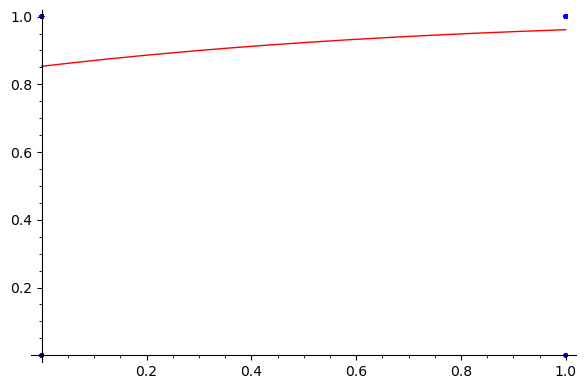

In [37]:
res=list(np.array(college["Research"]))

lg.fit(college[["Research"]],newPro)
int=lg.intercept_[0]
coe=lg.coef_[0][0]
chance=int+coe*x
show(chance)
list_plot([(res[i],newPro[i]) for i in range(len(gre))]) +plot(e^(int+coe*x)/(e^(int+coe*x)+1), (0 ,1), color = 'red')


The equation above models our relationship between research and graduate school admitance. It can be seen that there is roughly a 85% chance versus a 95% percent chance you will get admitted given if you did research or not. The nature of the line makes it clear that research is not as much a detrimental factor as something like GRE Score is.

## Closing Remarks (Before Homework of Course)

- Logistic Regression is a special type of regression analysis which focuses on binary outcomes as opposed to continous outcomes. This can be effectively used to classify whether something will occur, or if something belongs to a specified group. As we saw ,the unique nature of the logarithmic function attributes to the S shape of the curve given by implementing this method. It also has its y-axis ranging from 0 to one and is characteristic of probabilities used to classify our dependent variables. 
- Further applications of logistic regression include weather forcasting, credit scoring, medicine, hotel booking, and even gaming.

## ************************** Homework Excercise 1 **************************
### Time Series Analysis: Weather Forcasting
- For this homework question we will explore a direct application of logistic regression. weather forcasting. We will observe how we can model the rain fall in Perth, Australia based on the time of the year. This can also be reffered to as a **Time Series Analysis** as we will study the occurance of rainfall over time. Time series can also be used for predicting if people will show up to the gym on a weekend, or even to model the increase or decrease in a company's stock prices depending on where we are in the year. For now we will focus on Perth, Australia.
1) Convert monthly rainfall to a binomial output in order to be used for Logistic Regression
2) Perform a logistic regression analysis for the days of October 31,1944 through November 20,1944 (hint: use Google to find how many days it has been since day 1 of the data set!)
3) What stands out in the days February 10th,1958 to March 12, 1958? In other words what can you tell about the weather?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ausData=pd.read_csv('PerthTemperatures.csv')
ausData.head()

days=np.asarray([i for i in range(len(ausData))])
rain=ausData["Rainfall amount (millimetres)"]
ros=[]
for r in rain:
    if r==0:
        r=0
        ros.append(r)
    else:
        r=1
        ros.append(r)
ros=np.asarray(ros)    

#print(days[0:40])
#print(ros[0:40])
print(len(ausData))
ausData.head()

27647


,Year,Month,Day,Minimum temperature (Degree C),Maximum temperature (Degree C),Rainfall amount (millimetres),Quality
0,1944.0,6.0,3.0,11.0,22.3,0.0,N
1,1944.0,6.0,4.0,12.2,23.4,0.0,Y
2,1944.0,6.0,5.0,12.0,20.3,2.0,Y
3,1944.0,6.0,6.0,7.4,18.7,3.3,Y
4,1944.0,6.0,7.0,5.9,21.3,0.3,Y


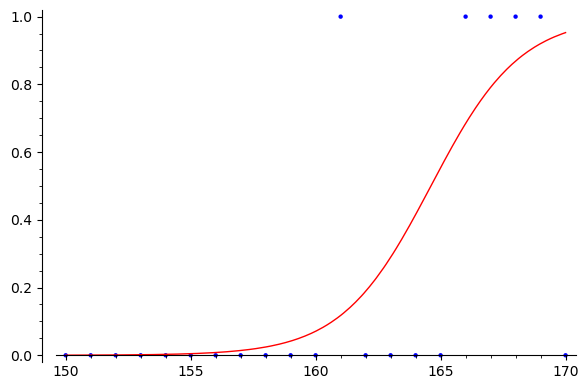

In [49]:
#Part 1
from sklearn.linear_model import LogisticRegression
day1=150
day2=170
lgi = LogisticRegression()
lgi.fit(days[day1:day2].reshape(-1,1),ros[day1:day2])
co1=lgi.coef_[0][0]
inter=lgi.intercept_[0]

list_plot([(days[i],ros[i]) for i in range(day1,day2+1)]) + plot(e^(inter+co1*x)/(e^(inter+co1*x)+1), (day1,day2), color = 'red')

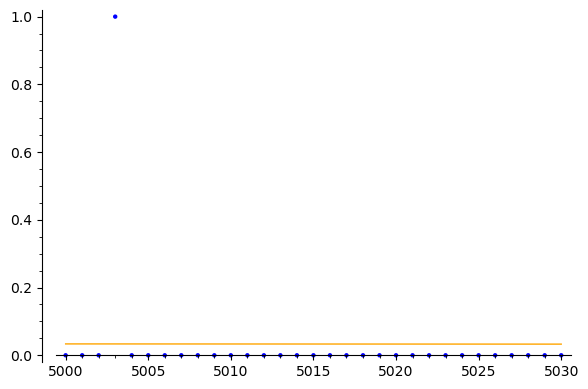

In [50]:
#Part 2-3)
day1a=5000
day2a=5030
lgi.fit(days[day1a:day2a].reshape(-1,1),ros[day1a:day2a])
co1a=lgi.coef_[0][0]
intera=lgi.intercept_[0]
list_plot([(days[i],ros[i]) for i in range(day1a,day2a+1)]) + plot(e^(intera+co1a*x)/(e^(intera+co1a*x)+1), (day1a,day2a), color = 'orange')
#You will notice that it rained for only one day during that period, so our line of best fit is not very telling of any trends. You can probably conclude that is summer or a non rainy season in Perth.

## ************************** Homework Excercise 2 **************************

Refer to the graduate school admissions data set at the beginning of the lecture for the duration of this excercise.
1) Divide our College Admissions data and determine the strength of the relationship between an applicants chances of acceptance and their performance on the GRE and TOEFL
2) Compare the plots of your training and testing data for TOEFL and GRE by comparing the plots as TOEFL Changes
3) Comment on your results. Do you see anything strange?


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

trainingData, testingData = train_test_split(college, test_size = .2, random_state = 3141592653)

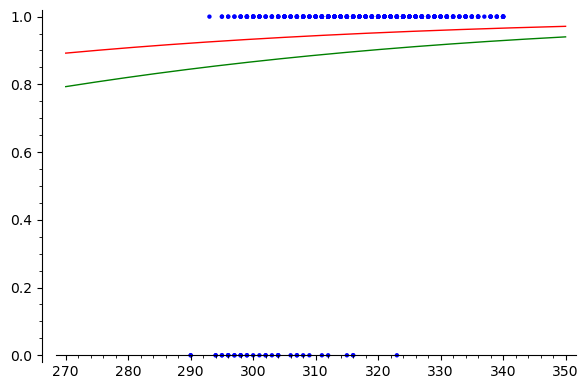

In [51]:
lg = LogisticRegression()
lg.fit(trainingData[['GRE Score', 'TOEFL Score']],newp[:320])
cg=lg.coef_[0][0]
ct=lg.coef_[0][1]
b=lg.intercept_[0]

toe1=min(trainingData["TOEFL Score"])
toe2=max(trainingData["TOEFL Score"])
f1(x)=e^(cg*x + ct*toe1 + b)/(e^(cg*x + ct*toe1 + b)+1)
f2(x)=e^(cg*x + ct*toe2 + b)/(e^(cg*x + ct*toe2 + b)+1)

trainpred=lg.predict(trainingData[['GRE Score',"TOEFL Score"]])
testpred=lg.predict(testingData[['GRE Score',"TOEFL Score"]])

#print(trainpred)
#print()
#print(testpred)

list_plot([(gre[i],newp[i]) for i in range(len(gre))]) + plot(f1, (270,350), color = 'red')+ plot(f2, (270,350), color = 'green')


Based on our data, if you have a lower TOEFL Score, but a similair GRE score, your chances of admission seem to be higher. This is a rather odd discovery.


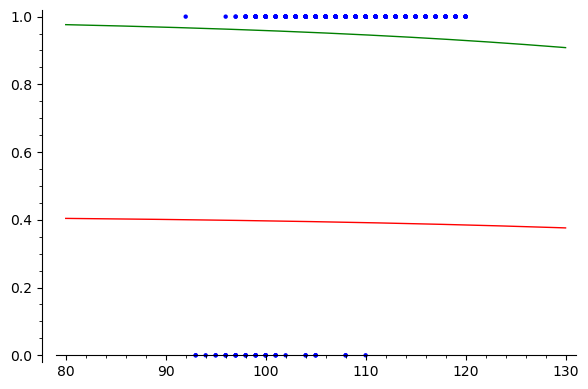

In [52]:
toefl = list(np.array(college["TOEFL Score"]))

lg = LogisticRegression()
lg.fit(trainingData[['GRE Score', 'TOEFL Score']],newp[:320])
cg1=lg.coef_[0][0]
ct1=lg.coef_[0][1]
b1=lg.intercept_[0]

ge1=min(trainingData["GRE Score"])
ge2=max(trainingData["GRE Score"])
g1(x)=e^(cg1*ge1 + ct1*x + b1)/(e^(cg1*ge2 + ct1*x + b1)+1)
g2(x)=e^(cg1*ge2+ ct1*x+ b1)/(e^(cg1*ge2 + ct1*x + b1)+1)

trainpred1=lg.predict(trainingData[['GRE Score',"TOEFL Score"]])
testpred1=lg.predict(testingData[['GRE Score',"TOEFL Score"]])

#print(trainpred)
#print()
#print(testpred)

list_plot([(toefl[i],newp[i]) for i in range(len(gre))]) + plot(g1, (80,130), color = 'red')+ plot(g2, (80,130), color = 'green')



Now we see the opposite effect in regards to a changing GRE. Interesting.
